This dataset is created for prediction of Graduate Admissions from an Indian perspective.



Importing libraries :

`pandas`: To load Admission_Predict csv file.

`numpy`: For for numerical computing in Python.

`matplotlib`: For visualization
```

In [55]:
%pip install pandas
%pip install numpy
%pip install matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [56]:
#loading the dataset
data=pd.read_csv("../Dataset/Admission_Predict.csv")

In [57]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [58]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [59]:
data.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [60]:
def train_test_split(X,y,test_size=0.2,shuffle=True,random_state=None):
    if shuffle:
        if random_state:
            np.random.seed(random_state)
        idx=np.arange(X.shape[0])
        np.random.shuffle(idx)
        X=X.iloc[idx]
        y=y.iloc[idx]
    split_idx=int(X.shape[0]*(1-test_size))
    X_train,X_test=X[:split_idx],X[split_idx:]
    y_train,y_test=y[:split_idx],y[split_idx:]
    return X_train,X_test,y_train,y_test

In [61]:
def standardize(X_train,X_test):
    mean=X_train.mean(axis=0)
    std=X_train.std(axis=0)
    X_train_std=(X_train-mean)/std
    X_test_std=(X_test-mean)/std
    return X_train_std,X_test_std

In [62]:
def cost(X,y,w,b):
    m=X.shape[0]
    y_pred=np.dot(X,w)+b
    cost=(1/(2*m))*np.sum((y_pred - y)**2)
    return cost

In [63]:
def partial_derivative(X,y,w,b):
    f_wb=np.dot(X,w)+b
    m=X.shape[0]
    dj_dw=(1/m)*np.dot(X.T,(f_wb - y))
    dj_db=(1/m)*np.sum(f_wb - y)
    return dj_dw,dj_db

In [64]:
def gradient_descent(X,y,w,b,num_iters,alpha):
    m=X.shape[0]
    j_history=[]
    for i in range(num_iters):
        dj_dw,dj_db=partial_derivative(X,y,w,b)
        w=w - alpha*dj_dw
        b=b - alpha*dj_db
        if i%100==0:
            j_history.append(cost(X,y,w,b))
        if i%100==0:
            print(f"Iteration {i}: Cost {j_history[-1]}")
    return w,b,j_history

        
        

In [65]:
data=data.drop(columns='Serial No.')

In [66]:
X_train,X_test,y_train,y_test=train_test_split(data.iloc[:,:-1],data.iloc[:,-1],test_size=0.2,shuffle=True,random_state=42)

In [67]:
X_train.shape

(320, 7)

In [68]:
y_train.shape

(320,)

In [69]:
X_train_std,X_test_std=standardize(X_train,X_test)

In [70]:
X_train_std

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
209,-1.317132,-0.542435,-0.052900,0.131966,0.633445,-0.815949,0.955670
280,-0.449706,-0.876562,-0.052900,1.125593,0.633445,0.076596,0.955670
33,2.065828,1.128201,1.728993,0.628779,0.633445,1.724370,0.955670
210,0.764690,0.125820,0.838046,1.125593,0.633445,0.797497,0.955670
93,-1.317132,-1.711880,-0.943846,-0.364847,-0.505332,-1.227892,0.955670
...,...,...,...,...,...,...,...
216,0.504462,0.794074,0.838046,1.125593,1.202834,1.140783,0.955670
279,-1.056904,-0.876562,-0.943846,-0.364847,0.633445,0.231075,-1.043117
346,-1.056904,-1.711880,-0.943846,-1.855287,-1.644110,-1.639836,-1.043117
236,0.764690,0.794074,0.838046,0.628779,1.202834,0.986305,0.955670


In [71]:
w=np.zeros(X_train.shape[1]).reshape(-1,1)
w.shape

(7, 1)

In [72]:
w=np.zeros(X_train.shape[1]).reshape(-1,1)
w.shape

(7, 1)

In [ ]:
w=np.zeros(X_train.shape[1]).reshape(-1,1)
b=0
alpha=0.001
num_iters=5000
w,b,_=gradient_descent(X_train_std.values,y_train.values.reshape(-1,1),w,b,num_iters,alpha)

Iteration 0: Cost 0.26775942996704594
Iteration 100: Cost 0.2162979056472219
Iteration 200: Cost 0.17625292537646584
Iteration 300: Cost 0.1442519832681544
Iteration 400: Cost 0.11834717630111294
Iteration 500: Cost 0.09724927783736066
Iteration 600: Cost 0.08001760017707539
Iteration 700: Cost 0.06592514987671415
Iteration 800: Cost 0.05439296186569879
Iteration 900: Cost 0.04495314432940747
Iteration 1000: Cost 0.03722493768510848
Iteration 1100: Cost 0.03089748664724036
Iteration 1200: Cost 0.025716627439344487
Iteration 1300: Cost 0.021474405801151467
Iteration 1400: Cost 0.01800062160690834
Iteration 1500: Cost 0.01515595407055302
Iteration 1600: Cost 0.012826351409672615
Iteration 1700: Cost 0.010918444581989338
Iteration 1800: Cost 0.009355795219088558
Iteration 1900: Cost 0.008075824914422908
Iteration 2000: Cost 0.007027301716761467
Iteration 2100: Cost 0.006168282561218233
Iteration 2200: Cost 0.005464428872528653
Iteration 2300: Cost 0.004887627636332648
Iteration 2400: Cost

In [74]:
w,b

(array([[0.02381979],
        [0.02399259],
        [0.00844076],
        [0.00363214],
        [0.02018134],
        [0.04952959],
        [0.01405551]]),
 np.float64(0.7137950409178414))

In [75]:
# train
y_pred=np.dot(X_train_std.values,w)+b
error=np.sum((y_pred-y_train.values.reshape(-1,1))**2)
m=X_train.shape[0]
mse=((1/m)*error)
print(np.sqrt(mse))


0.06705074974773374


In [76]:
y_pred_train=np.dot(X_train_std.values,w)+b
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_train,y_pred_train)))

0.06705074974773373


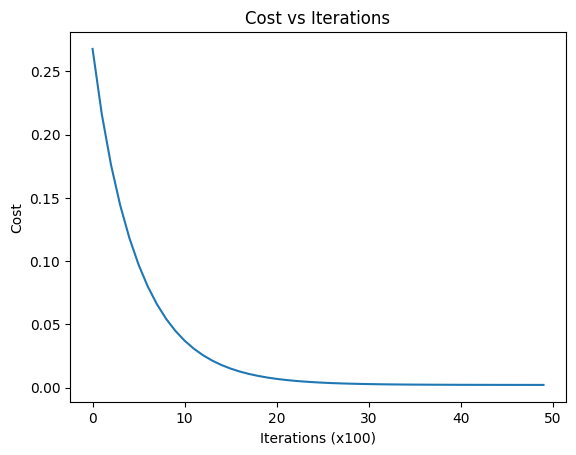

In [77]:
plt.plot(_)
plt.xlabel("Iterations (x100)")
plt.ylabel("Cost")
plt.title("Cost vs Iterations")
plt.show()


In [78]:
# test
y_pred_test=np.dot(X_test_std.values,w)+b
error=np.sum((y_pred_test-y_test.values.reshape(-1,1))**2)
m=X_test.shape[0]
mse_test=(1/m)*error
print(np.sqrt(mse_test))


0.05149317292129013


In [79]:
y_pred_test=np.dot(X_test_std.values,w)+b
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test,y_pred_test)))

0.05149317292129013


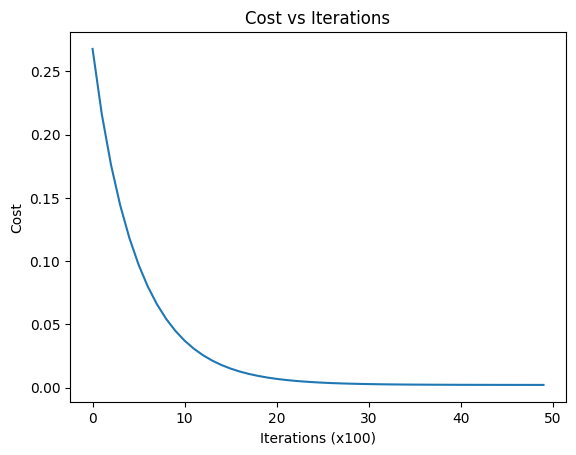

In [80]:
plt.plot(_)
plt.xlabel("Iterations (x100)")
plt.ylabel("Cost")
plt.title("Cost vs Iterations")
plt.show()
